<a href="https://colab.research.google.com/github/dorelysm/AI_practices/blob/main/Regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Titanic Kaggle
#https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [1]:
import pandas as pd
datos = pd.read_csv('train.csv')
datos.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
datos.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<Axes: xlabel='Survived', ylabel='count'>

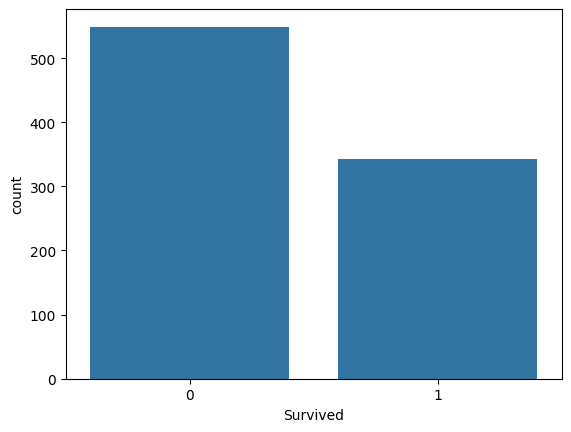

In [3]:
import seaborn as sb
sb.countplot(x='Survived', data=datos)

<Axes: xlabel='Survived', ylabel='count'>

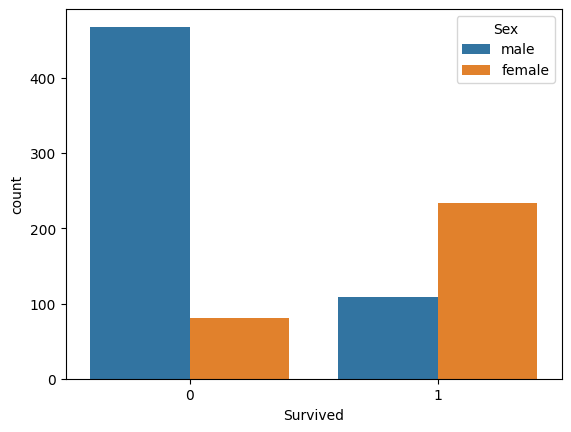

In [4]:
sb.countplot(x='Survived', data=datos, hue="Sex")

In [5]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

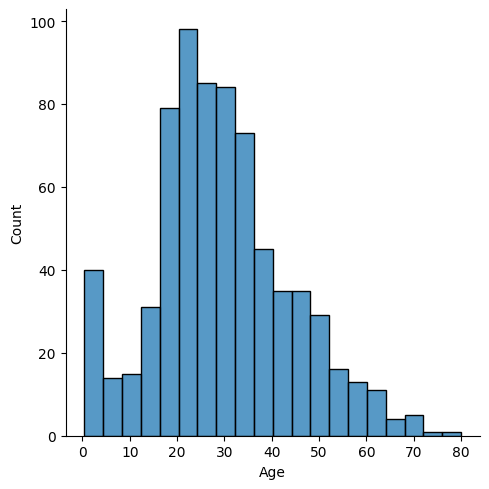

In [7]:
sb.displot(x="Age", data=datos)

In [8]:
datos["Age"].mean()

29.69911764705882

In [11]:
datos["Age"] = datos["Age"].fillna(datos['Age'].mean())

In [18]:
datos.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
datos = datos.drop(["Cabin"], axis=1)

In [15]:
datos = datos.dropna()

In [17]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [21]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True, dtype = int)

In [22]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

In [28]:
datos.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

<Axes: xlabel='Survived', ylabel='count'>

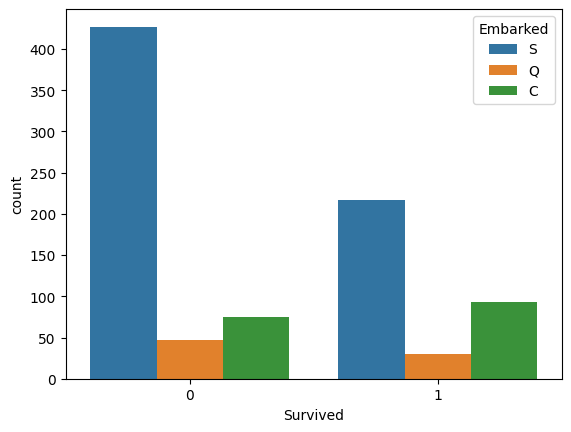

In [24]:
sb.countplot(x="Survived", data = datos, hue = "Embarked")

In [26]:
dummies_Embarked = pd.get_dummies(datos["Embarked"], drop_first=True, dtype = int)

In [27]:
datos = datos.join(dummies_Embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

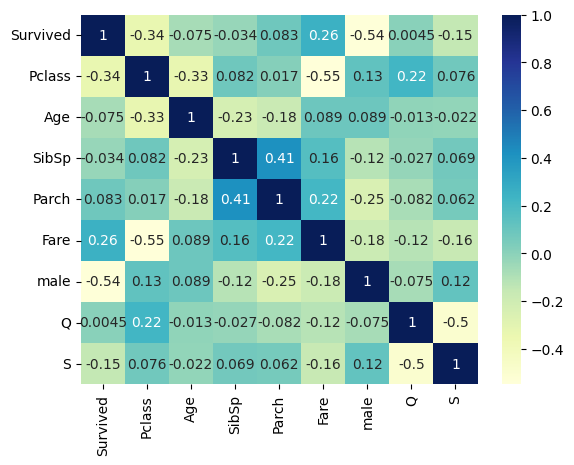

In [29]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

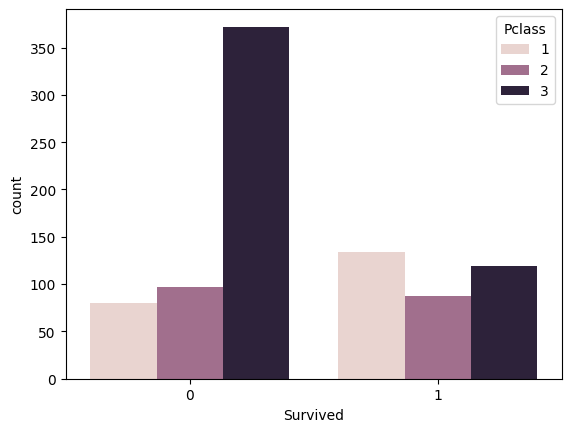

In [30]:
sb.countplot(x="Survived", data = datos, hue = "Pclass")

In [31]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [32]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size = 0.2)

In [34]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_ent, y_ent)

LogisticRegression(max_iter=1000)

In [35]:
predicciones = modelo.predict(X_pru)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8314606741573034

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       108
           1       0.81      0.74      0.78        70

    accuracy                           0.83       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru, predicciones)

array([[96, 12],
       [18, 52]])

In [39]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

Pred: No  Pred: Si
Real: No        96        12
Real: Si        18        52

In [41]:
X.head()

Pclass   Age  SibSp  Parch     Fare  male  Q  S
0       3  22.0      1      0   7.2500     1  0  1
1       1  38.0      1      0  71.2833     0  0  0
2       3  26.0      0      0   7.9250     0  0  1
3       1  35.0      1      0  53.1000     0  0  1
4       3  35.0      0      0   8.0500     1  0  1

In [45]:
nueva_persona = [3, 23, 0, 3, 10, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
    print("Sobreviviste")
else:
    print("No sobreviviste")

Sobreviviste


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
